In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

# Methods
from sklearn.linear_model import LinearRegression

# Model selection and evaluation tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

In [3]:
from tutorial4 import regplots

In [5]:
df = pd.read_csv('train.csv')

TypeError: can only concatenate str (not "float") to str

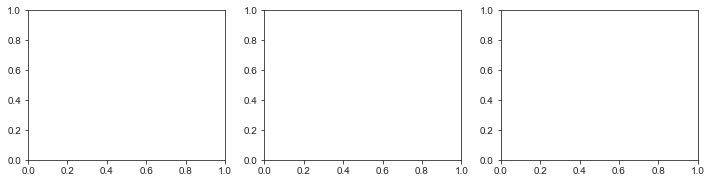

In [11]:
predictors = ['latitude', 'longitude']

regplots(df[predictors], df['price'])

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [3]:
# Auxiliary code - important to understand but similar to previous tutorials

data = pd.DataFrame(np.c_[data.data, data.target], columns = data.feature_names + ['MedianHouseValue'])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Auxiliary code - important to understand but similar to previous tutorials

response = data.columns[-1] # last column in the dataframe
predictors= list(data.columns[:-1]) # all columns except the last
    
index_train, index_valid  = train_test_split(np.array(data.index), train_size = 0.2, random_state=1)

train = data.loc[index_train,:].copy()
valid =  data.loc[index_valid,:].copy()

y_train = np.log(train[response])
y_valid = np.log(valid[response])

X_train = train[predictors].to_numpy()
X_valid = valid[predictors].to_numpy()

In [5]:
len(X_train)

4128

In [6]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [7]:
import xgboost as xgb
xgb.__version__

'1.4.0'

In [8]:
# xgbst = xgb.XGBRegressor(objective='reg:squarederror', booster = 'gbtree', learning_rate = 0.02, 
#                          max_depth = 2, n_estimators = 122, subsample = 0.60,  reg_lambda=0.0, 
#                          reg_alpha = 0.0, colsample_bytree = 1.0, min_child_weight = 1.0)

In [9]:
import xgboost as xgb

xgbst = xgb.XGBRegressor(objective='reg:squarederror', booster = 'gbtree', learning_rate = 0.02, 
                         max_depth = 2, n_estimators = 122, subsample = 0.60,  reg_lambda=0.0, 
                         reg_alpha = 0.0, colsample_bytree = 1.0, min_child_weight = 1.0)

In [10]:
# n_estimators: number of trees
# subsample: fraction of observations used to fit each tree
# reg_lambda: L2 regularisation penalty
# reg_alpha: L1 regularisation penalty
# colsample_bytree: fraction of features considered for each tree (alternatives: bylevel, bynode)
# min_child_weight: approximately equal to the minimum number of samples in each node

xgbst.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=2,
             min_child_weight=1.0, missing=nan, monotone_constraints='()',
             n_estimators=122, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)